# Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('cryptoranktable_220410.csv', delimiter= ';', decimal=',')

In [4]:
df.shape

(3254, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3254 non-null   object 
 1   Price         3118 non-null   float64
 2   Sale Price    3223 non-null   float64
 3   Market Cap    2835 non-null   float64
 4   Raise         2941 non-null   object 
 5   ROI USD       3092 non-null   float64
 6   ATH ROI USD   3092 non-null   float64
 7   Type          3254 non-null   object 
 8   TGE Platform  2203 non-null   object 
 9   Ended         3163 non-null   object 
 10  Category      3171 non-null   object 
dtypes: float64(5), object(6)
memory usage: 279.8+ KB


In [31]:
df['Raise'] = df['Raise'].apply(lambda x: str(x).replace('.', '')).astype('float')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3254 non-null   object 
 1   Price         3118 non-null   float64
 2   Sale Price    3223 non-null   float64
 3   Market Cap    2835 non-null   float64
 4   Raise         2941 non-null   float64
 5   ROI USD       3092 non-null   float64
 6   ATH ROI USD   3092 non-null   float64
 7   Type          3254 non-null   object 
 8   TGE Platform  2203 non-null   object 
 9   Ended         3163 non-null   object 
 10  Category      3171 non-null   object 
dtypes: float64(6), object(5)
memory usage: 279.8+ KB


In [38]:
df.nunique()

Name            2004
Price            963
Sale Price       546
Market Cap      1546
Raise            821
ROI USD          574
ATH ROI USD     1410
Type               3
TGE Platform     105
Ended            902
Category          44
dtype: int64

# Categorias Com maior ATH

<AxesSubplot:xlabel='Category'>

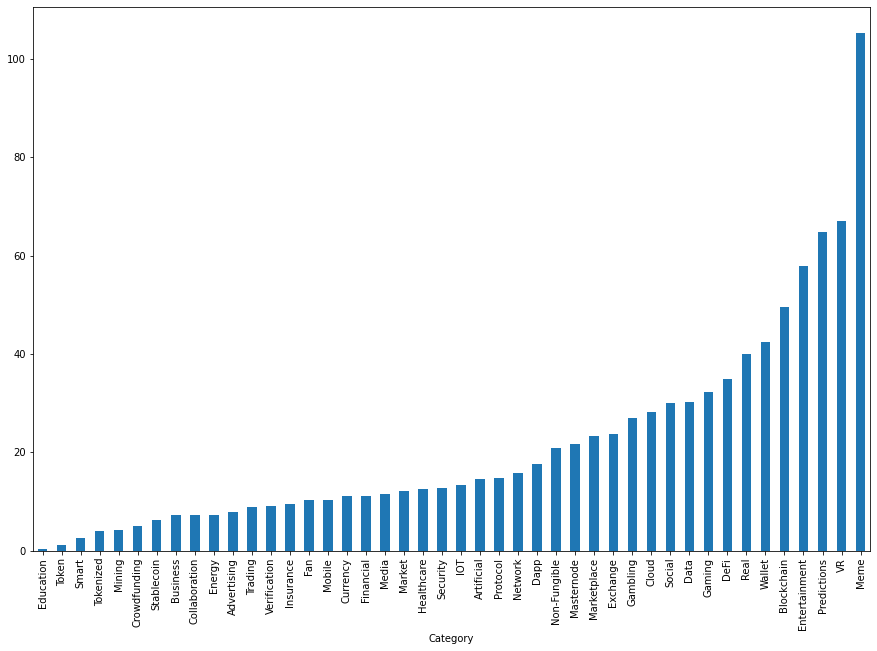

In [46]:
df.groupby('Category').agg(['mean'])[('ATH ROI USD', 'mean')].sort_values().plot(kind = 'bar', figsize = (15,10))

## Contador e Mean

<AxesSubplot:xlabel='Category'>

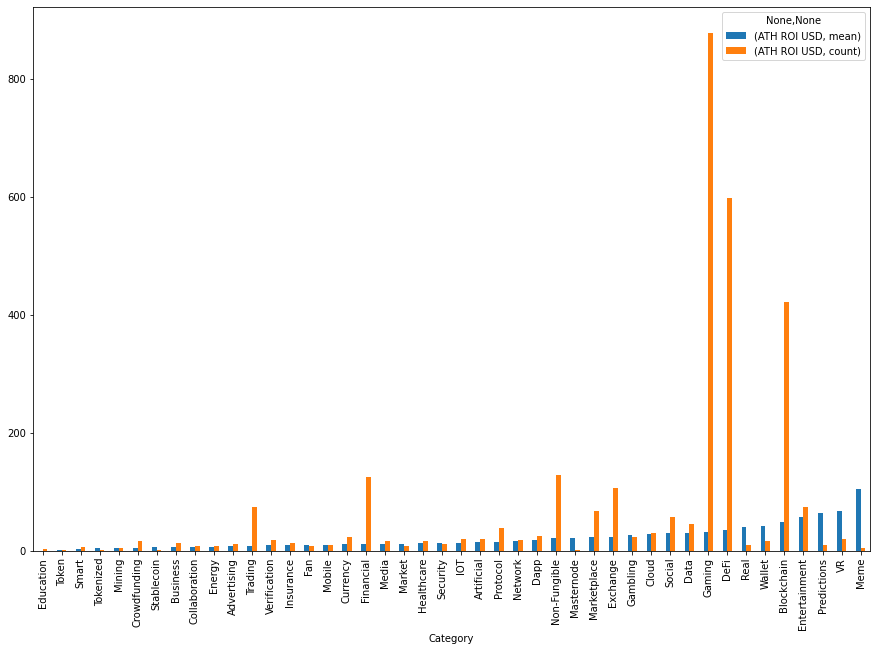

In [49]:
df.groupby('Category').agg(['mean', 'count'])[[('ATH ROI USD', 'mean'), ('ATH ROI USD', 'count')]].sort_values(by =('ATH ROI USD', 'mean') ).plot(kind = 'bar', figsize = (15,10))

###  Mean, Max, Median, Min

<AxesSubplot:xlabel='Category'>

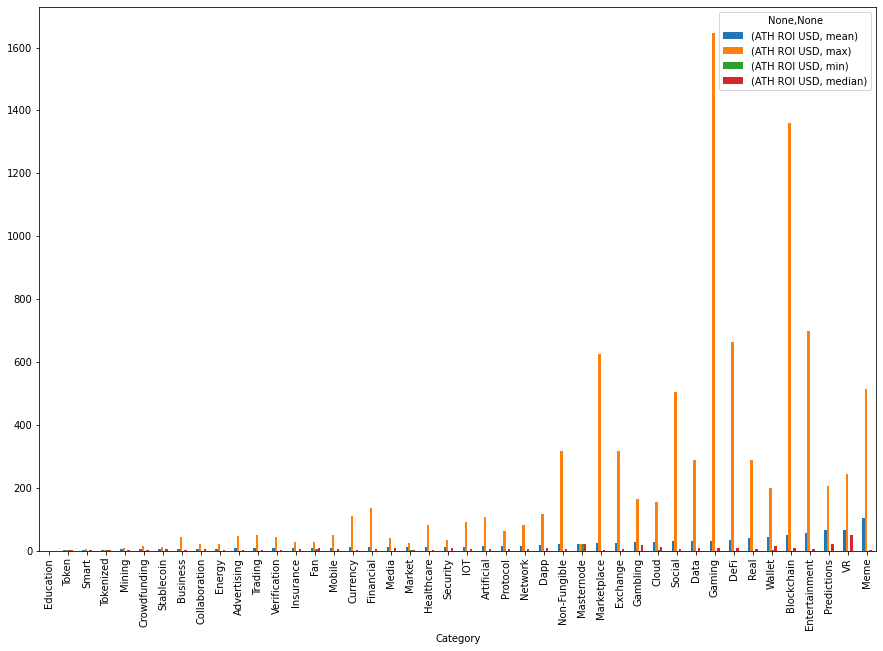

In [113]:
df.groupby('Category').agg(['mean', 'max', 'median', 'min'])[[('ATH ROI USD', 'mean'), ('ATH ROI USD', 'max'), ('ATH ROI USD', 'min'), ('ATH ROI USD', 'median')]].sort_values(by =('ATH ROI USD', 'mean') ).plot(kind = 'bar', figsize = (15,10))

## Modelo de Regressao

###  Pipeline

In [61]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [95]:
from statsmodels.api import OLS
import statsmodels.api as sm

In [112]:
model = LinearRegression()
tmp_df = df.drop(columns = ['TGE Platform']).copy().dropna()

cat_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))
num_pipe = make_pipeline(StandardScaler())
make_column_transformer.get_feature_names_out = (lambda self, names=None: self.feature_names_in_)
preprocessing = make_column_transformer((cat_pipe, ['Category']),
                                    (num_pipe, ['Price', 'Raise']))

X = preprocessing.fit_transform(tmp_df)
y = tmp_df['ATH ROI USD']

model = OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ATH ROI USD   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.361
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.02e-34
Time:                        21:05:00   Log-Likelihood:                -14890.
No. Observations:                2496   AIC:                         2.987e+04
Df Residuals:                    2450   BIC:                         3.014e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.7300     33.657      0.259      0.795     -57.269      74.729
x2            18.9104     24.578      0.769      0.442     -29.286      67.106
x3            43.7224      5.293      8.260      0.000      33.343      54.102
x4            12.8135     35.979      0.356      0.722     -57.739      83.366
x5            21.5470     19.865      1.085      0.278     -17.407      60.501
x6            10.8799     33.656      0.323      0.747     -55.116      76.876
x7             8.9799     28.702      0.313      0.754     -47.302      65.262
x8            -9.6845     28.751     -0.337      0.736     -66.063      46.694
x9            25.6233     21.839      1.173      0.241     -17.202      68.448
x10           37.4814     15.650      2.395      0.017       6.793      68.170
x11           39.7054      4.264      9.312      0.000      31.344      48.067
x12            4.1944     67.310      0.062      0.950    -127.796     136.185
x13           13.2605     42.572      0.311      0.755     -70.220      96.741
x14           65.2748     11.545      5.654      0.000      42.636      87.914
x15           24.8134     10.148      2.445      0.015       4.915      44.712
x16           -3.1386     35.991     -0.087      0.931     -73.714      67.437
x17           14.3994      9.873      1.458      0.145      -4.961      33.760
x18           34.4138     22.438      1.534      0.125      -9.585      78.412
x19           34.6633      3.366     10.299      0.000      28.064      41.263
x20           15.6766     24.581      0.638      0.524     -32.524      63.877
x21           14.9211     28.702      0.520      0.603     -41.361      71.204
x22           12.8455     26.402      0.487      0.627     -38.927      64.618
x23           15.8339     33.656      0.470      0.638     -50.163      81.831
x24           14.4544     12.836      1.126      0.260     -10.717      39.626
x25           13.4658     95.191      0.141      0.888    -173.198     200.130
x26            4.6296     28.710      0.161      0.872     -51.668      60.927
x27          135.0654     47.596      2.838      0.005      41.733     228.398
x28            7.6402     47.597      0.161      0.872     -85.694     100.975
x29           15.6281     35.981      0.434      0.664     -54.928      86.184
x30           23.9127     28.701      0.833      0.405     -32.368      80.193
x31           24.4238      9.038      2.702      0.007       6.700      42.147
x32           88.8205     47.596      1.866      0.062      -4.511     182.152
x33           19.9528     17.677      1.129      0.259     -14.710      54.616
x34           12.3461     35.979      0.343      0.732     -58.206      82.898
x35           16.6151     30.105      0.552      0.581     -42.419      75.649
x36            6.3462     38.862      0.163      0.870     -69.859      82.552
x3

### Usando StatsModel

In [101]:
tmp_df['ATH_ROI_USD'] = tmp_df['ATH ROI USD']

In [107]:
#JGP, #BrodCast, Bloomberg
import statsmodels.formula.api as smf
model = smf.ols(formula='ATH_ROI_USD ~ Price + Raise + C(Category)', data=tmp_df).fit()

In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ATH_ROI_USD   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.361
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.02e-34
Time:                        20:55:46   Log-Likelihood:                -14890.
No. Observations:                2496   AIC:                         2.987e+04
Df Residuals:                    2450   BIC:                         3.014e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.0449     33.658      0.150      0.881     -60.956      71.045
C(Category)[T.Artificial]       10.1804     41.675      0.244      0.807     -71.541      91.902
C(Category)[T.Blockchain]       34.9924     34.072      1.027      0.305     -31.821     101.806
C(Category)[T.Business]          4.0834     49.266      0.083      0.934     -92.525     100.691
C(Category)[T.Cloud]            12.8169     39.085      0.328      0.743     -63.826      89.460
C(Category)[T.Collaboration]     2.1499     47.596      0.045      0.964     -91.182      95.482
C(Category)[T.Crowdfunding]      0.2499     44.233      0.006      0.995     -86.488      86.987
C(Category)[T.Currency]        -18.4145     44.267     -0.416      0.677    -105.219      68.390
C(Category)[T.Dapp]             16.8933     40.121      0.421      0.674     -61.781      95.568
C(Category)[T.Data]             28.7514     37.117      0.775      0.439     -44.032     101.535
C(Category)[T.DeFi]             30.9753     33.926      0.913      0.361     -35.551      97.502
C(Category)[T.Education]        -4.5356     75.255     -0.060      0.952    -152.107     143.035
C(Category)[T.Energy]            4.5305     54.267      0.083      0.933    -101.883     110.943
C(Category)[T.Entertainment]    56.5448     35.582      1.589      0.112     -13.229     126.318
C(Category)[T.Exchange]         16.0834     35.153      0.458      0.647     -52.849      85.015
C(Category)[T.Fan]             -11.8686     49.282     -0.241      0.810    -108.506      84.769
C(Category)[T.Financial]         5.6693     35.073      0.162      0.872     -63.106      74.445
C(Category)[T.Gambling]         25.6838     40.450      0.635      0.526     -53.637     105.004
C(Category)[T.Gaming]           25.9333     33.825      0.767      0.443     -40.396      92.262
C(Category)[T.Healthcare]        6.9466     41.674      0.167      0.868     -74.773      88.666
C(Category)[T.IOT]               6.1910     44.232      0.140      0.889     -80.544      92.926
C(Category)[T.Insurance]         4.1154     42.776      0.096      0.923     -79.766      87.997
C(Category)[T.Market]            7.1038     47.597      0.149      0.881     -86.231     100.438
C(Category)[T.Marketplace]       5.7243     36.021      0.159      0.874     -64.911      76.360
C(Category)[T.Masternode]        4.7358    100.968      0.047      0.963    -193.255     202.727
C(Category)[T.Media]            -4.1005     44.243     -0.093      0.926     -90.857      82.656
C(Category)[T.Meme]            126.3354     58.293      2.167      0.030      12.026     240.645
C(Category)[T.Mining]           -1.0898     58.292     -0.019      0.985    -115.396     113.216
C(Category)[T.Mobile]            6.8980     49.265      0.140      0.889    

In [111]:
model.pvalues[model.pvalues < 0.05]

C(Category)[T.Meme]    3.031293e-02
Price                  2.129041e-49
dtype: float64